### Stock Market Prediction And Forecasting Using Stacked LSTM

In [2]:
### Keras and Tensorflow >2.0

In [3]:
### Data Collection
import pandas_datareader as pdr
import os
import yfinance as yf
import datetime as dt

In [9]:
start = dt.datetime(2022,12,1)
end = dt.datetime.today()
df = yf.download('^HSI',start,end)

[*********************100%%**********************]  1 of 1 completed


In [10]:
df.to_csv('HSI.csv')

In [11]:
import pandas as pd

In [12]:
df=pd.read_csv('HSI.csv')

In [13]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-12-01,19058.900391,19237.449219,18679.349609,18736.439453,18736.439453,4262000300
1,2022-12-02,18785.279297,18841.220703,18530.820312,18675.349609,18675.349609,3757394000
2,2022-12-05,19221.679688,19539.599609,19035.140625,19518.289062,19518.289062,4890142300
3,2022-12-06,19211.699219,19569.669922,19202.869141,19441.179688,19441.179688,3552078500
4,2022-12-07,19380.800781,19737.310547,18799.810547,18814.820312,18814.820312,5308866200


In [14]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
242,2023-11-29,17359.080078,17359.080078,16881.980469,16993.439453,16993.439453,2810136500
243,2023-11-30,16985.179688,17068.259766,16863.050781,17042.880859,17042.880859,3013993300
244,2023-12-01,17019.169922,17038.980469,16830.300781,16830.300781,16830.300781,2434410800
245,2023-12-04,16919.080078,16941.910156,16617.029297,16646.050781,16646.050781,2476132300
246,2023-12-05,16606.539062,16606.539062,16228.519531,16327.860352,16327.860352,0


In [15]:
df1=df.reset_index()['Close']

In [16]:
df1

0      18736.439453
1      18675.349609
2      19518.289062
3      19441.179688
4      18814.820312
           ...     
242    16993.439453
243    17042.880859
244    16830.300781
245    16646.050781
246    16327.860352
Name: Close, Length: 247, dtype: float64

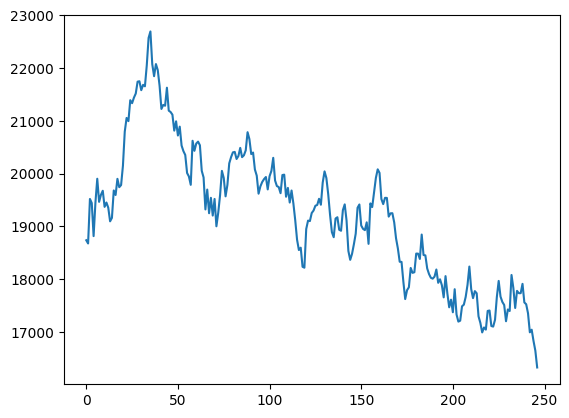

In [17]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [16]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [17]:
import numpy as np

In [18]:
df1

0        9365.519531
1        9583.849609
2        9665.959961
3        9652.400391
4        9688.209961
            ...     
5137    17230.589844
5138    17664.119141
5139    17966.589844
5140    17670.160156
5141    17568.460938
Name: Close, Length: 5142, dtype: float64

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [20]:
print(df1)

[[0.03865449]
 [0.04747765]
 [0.0507959 ]
 ...
 [0.38624114]
 [0.37426182]
 [0.37015195]]


In [21]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [22]:
training_size,test_size

(3342, 1800)

In [23]:
train_data

array([[0.03865449],
       [0.04747765],
       [0.0507959 ],
       ...,
       [0.53150097],
       [0.53546901],
       [0.5412855 ]])

In [24]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [25]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [26]:
print(X_train.shape), print(y_train.shape)

(3241, 100)
(3241,)


(None, None)

In [27]:
print(X_test.shape), print(ytest.shape)

(1699, 100)
(1699,)


(None, None)

In [28]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [29]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [30]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
51/51 [==============================] - 14s 210ms/step - loss: 0.0230 - val_loss: 0.0061
Epoch 2/100
51/51 [==============================] - 11s 212ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 3/100
51/51 [==============================] - 10s 201ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 4/100
51/51 [==============================] - 10s 204ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 5/100
51/51 [==============================] - 10s 203ms/step - loss: 9.6221e-04 - val_loss: 0.0012
Epoch 6/100
51/51 [==============================] - 10s 195ms/step - loss: 9.6867e-04 - val_loss: 0.0013
Epoch 7/100
51/51 [==============================] - 10s 199ms/step - loss: 8.8356e-04 - val_loss: 0.0013
Epoch 8/100
51/51 [==============================] - 10s 197ms/step - loss: 7.8472e-04 - val_loss: 0.0010
Epoch 9/100
51/51 [==============================] - 10s 201ms/step - loss: 8.4879e-04 - val_loss: 0.0018
Epoch 10/100
51/51 [==============================] - 10s 198m

In [34]:
import tensorflow as tf

In [35]:
tf.__version__

'2.14.0'

In [36]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

54/54 [==============================] - 2s 42ms/step


In [37]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [38]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

20029.704852324023

In [39]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

25250.145018544954

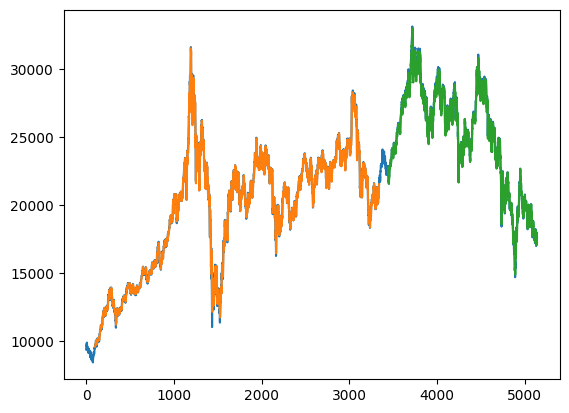

In [40]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [41]:
len(test_data)

1800

In [42]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 1459)

In [43]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [44]:
temp_input

[0.837711710259689,
 0.8257708257873221,
 0.8007961957763595,
 0.8039640405613576,
 0.8175691584283101,
 0.8307208249861854,
 0.8237938727954236,
 0.841099058628768,
 0.8388473512405424,
 0.8259853567983008,
 0.8341607405566299,
 0.8423744841646043,
 0.8415836082521665,
 0.846957223321494,
 0.8554821079321461,
 0.8562762199635866,
 0.8670278701672213,
 0.8692682906038022,
 0.8933603283539985,
 0.8952046793965064,
 0.9022982522510562,
 0.905456862257436,
 0.9088873851897988,
 0.9134087170153639,
 0.9159268122483474,
 0.9178128381892351,
 0.9296191474689169,
 0.9266419969158998,
 0.9495103870343077,
 0.9526892030520232,
 0.9582874521379973,
 0.9636602779100071,
 0.969258132347322,
 0.9909710701221998,
 0.9921022910380736,
 0.9798072488592088,
 1.0,
 0.9924336380520867,
 0.9779014115556443,
 0.9892159886063353,
 0.9793077815165038,
 0.9776787507822923,
 0.9632694968079633,
 0.8965977102326951,
 0.8855967210063668,
 0.8907723013786578,
 0.8526294295661462,
 0.8506981768889482,
 0.866050641

In [45]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.82577083 0.8007962  0.80396404 ... 0.38624114 0.37426182 0.37015195]


ValueError: cannot reshape array of size 1458 into shape (1,100,1)

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

In [ ]:
plt.plot(df3)